# DATA LADIES END OF YEAR HACKATHON NOTEBOOK 99.912% acc

## Acknowledgment
I want to express my heartfelt appreciation to the management team for orchestrating this engaging hackathon. This marked my beginning into data science competitions, and I must say it has been one of the most exciting experiences I've had. Throughout this journey, I've not only honed existing skills but also acquired new ones. In this comprehensive notebook, I am to share the details of my approach and methodologies that led to the remarkable 99.912% accuracy.
    
**anyway enough of the talking lets get started :)**

# Import the necessary Models

In [1]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import os

In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf

import tensorflow.keras.backend as K
import tokenizers
from transformers import RobertaTokenizer, TFRobertaModel

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Activate the TPU

In the pursuit of optimal performance, I used the power of Tensor Processing Units (TPUs) for training the following code. TPUs have proven to be very powerful, surpassing even GPUs in speed. Their exceptional efficiency becomes handy when handling large models such as Roberta Large, exhibiting remarkable and robust speeds that propel data science endeavors to new heights. 🚀

*Please note kaggle always has alot of users pending to use the TPUs so you might have to be a bit patient for it accuary initiate.*

In [5]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    print("TPU failed!")
    tpu = None
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

Device: 
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


2023-12-06 23:00:30.246615: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:00:30.246729: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:00:30.246819: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:00:30.246894: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:00:30.246969: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:00:30.247185: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:00:30.247268: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Number of replicas: 8


# EDA

In [6]:
df = pd.read_csv('/kaggle/input/data-ladies-end-of-year-hackathon/train_dataset.csv')
df.head()

,headline,clickbait,ID
0,"Hussein enters ""not guilty"" plea at trial",0,84698cc7-8ae2-4ea3-a425-b7091561cee6
1,Iraq peace talks draw to a close in Finland,0,a4e35ca4-15fa-43e8-b68e-91457b23afee
2,British Premier Visits Northern Ireland,0,162991ee-ea2f-41ad-a753-649a68f54311
3,The Decline of Left-Handed First Basemen,0,2cd3aa32-6ec2-4af1-bd1d-560709066b8b
4,Who Said It: Donald Trump Or Kanye West,1,72553370-c348-4603-882b-39e04b610c39


In [7]:
#Check for Null Values
for column in df:
    print(column, df[column].isnull().sum() / len(df) * 100)

headline 0.0
clickbait 0.0
ID 0.0


In [8]:
X_data = df[['headline']].to_numpy().reshape(-1)
y_data = df[['clickbait']].values

## Check the classes distribution

The classes have approximately the exact same length so no need to augment or even sample the dataset. so i will just continue with the dataset the way it is.

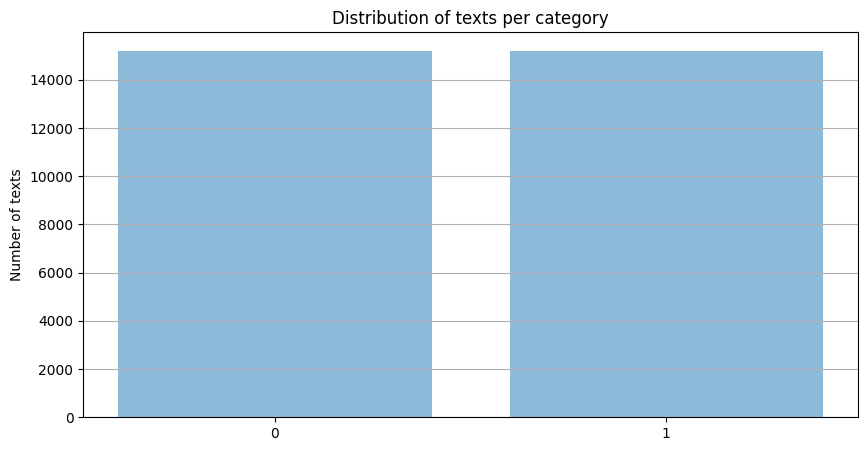

Counter({0: 15210, 1: 15190})


In [9]:
categories = df[['clickbait']].values.reshape(-1)

counter_categories = Counter(categories)
category_names = counter_categories.keys()
category_values = counter_categories.values()

y_pos = np.arange(len(category_names))

plt.figure(1, figsize=(10, 5))
plt.bar(y_pos, category_values, align='center', alpha=0.5)
plt.xticks(y_pos, category_names)
plt.ylabel('Number of texts')
plt.title('Distribution of texts per category')
plt.gca().yaxis.grid(True)
plt.show()

print(counter_categories)

## Sequence length

Before we select the best sequence length, we have to first check for the sentences with the longest sequences such that we don't lose any information during the training process. The Visualization shows that the maximum sentece length is of 135 characters.

(array([ 119., 1815., 8077., 9896., 6900., 2643.,  746.,  156.,   34.,
          14.]),
 array([  8. ,  20.7,  33.4,  46.1,  58.8,  71.5,  84.2,  96.9, 109.6,
        122.3, 135. ]),
 <BarContainer object of 10 artists>)

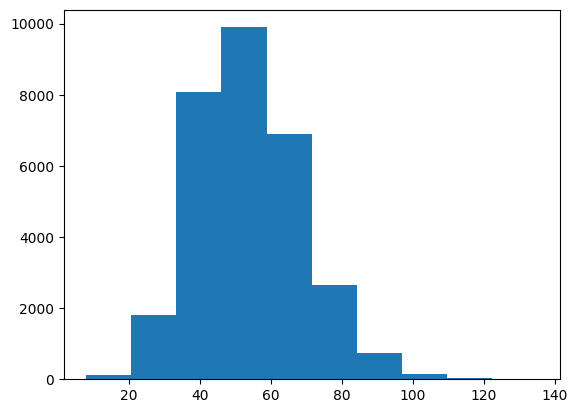

In [10]:
df["sentence lengths"] = df["headline"].map(lambda x : len(x))

plt.hist(df["sentence lengths"])

In [11]:
# Now we can define our variables
MODEL_NAME = 'roberta-large'
MAX_LEN = 135
ARTIFACTS_PATH = '../artifacts/'

BATCH_SIZE = 8 * strategy.num_replicas_in_sync

if not os.path.exists(ARTIFACTS_PATH):
    os.makedirs(ARTIFACTS_PATH)

In [12]:
BATCH_SIZE

64

In [13]:
n_texts = len(X_data)
print('Texts in dataset: %d' % n_texts)

categories = df['clickbait'].unique()
n_categories = len(categories)
print('Number of categories: %d' % n_categories)

print('Done!')

Texts in dataset: 30400
Number of categories: 2
Done!


# THE MODEL

We will be finetuning the Roberta Large Model for this classification task. 

## But why RoBerta 🤔

RoBERTa is a natural language processing (NLP) model that is based on Google’s BERT model.It uses self-attention to process input sequences and generate contextualized representations of words in a sentence, similar to BERT. However, RoBERTa was trained on a much larger dataset and using a more effective training procedure than BERT. This allows RoBERTa to improve on the masked language modeling objective compared with BERT and leads to better downstream task performance.

Makes sense ? Great Let's Continue

We will bw using huggingface 🤗 transformers pretrained model roberta-large. Lets get to it then.

First we are going to build the tokenize there after finetune the model on our dataset

In [14]:
def roberta_encode(texts, tokenizer):
    ct = len(texts)
    input_ids = np.ones((ct, MAX_LEN), dtype='int32')
    attention_mask = np.zeros((ct, MAX_LEN), dtype='int32')
    token_type_ids = np.zeros((ct, MAX_LEN), dtype='int32') # Not used in text classification

    for k, text in enumerate(texts):
        
        # Tokenize
        tok_text = tokenizer.tokenize(text)

        # Truncate and convert tokens to numerical IDs
        enc_text = tokenizer.convert_tokens_to_ids(tok_text[:(MAX_LEN-2)])

        input_length = len(enc_text) + 2
        input_length = input_length if input_length < MAX_LEN else MAX_LEN

        # Add tokens [CLS] and [SEP] at the beginning and the end
        input_ids[k,:input_length] = np.asarray([0] + enc_text + [2], dtype='int32')

        # Set to 1s in the attention input
        attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }

In [15]:
y_data = tf.keras.utils.to_categorical(y_data)

In [16]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=777) # random_state to reproduce results

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21280,), (9120,), (21280, 2), (9120, 2))

In [18]:
from transformers import AutoTokenizer, TFAutoModel

In [19]:
# Import tokenizer from HuggingFace
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [20]:
X_train = roberta_encode(X_train, tokenizer)
X_test = roberta_encode(X_test, tokenizer)

y_train = np.asarray(y_train, dtype='int32')
y_test = np.asarray(y_test, dtype='int32')

# Next We Build the Model

since we are using TPUs, we have to include the strategy.scope() when initiating our such that the model is built on the TPU devices. this will give the blazing traing speeds  🚀.

**NB**
The model uses an addition Layer Normalization layer so as to normalize our layers and as a result improve the overall models performance. This idea was adopted from the following [link](https://www.sciencedirect.com/science/article/pii/S2666827022000792),
i removed dropout because the accuracy was decreasing on continous testing.

I also added another dense layer with ***selu activation function***.

## Now why Selu 🤔

The Scaled Exponential Linear Unit (SELU) is an activation function similar to the Rectified Linear Unit (ReLU) activation function, but with some key differences.  The SELU function has the property of self-normalization, which means that the output of each layer of a neural network will have zero mean and unit variance if the weights are initialized in a certain way. This can lead to faster convergence and better performance on certain tasks.

Make Sense ?, Let's continue 🙂

In [21]:
def build_model(n_categories):
    with strategy.scope():
        input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_word_ids')
        input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_mask')
        input_type_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_type_ids')

        # Import RoBERTa model from HuggingFace
        roberta_model = TFAutoModel.from_pretrained(MODEL_NAME)
        x = roberta_model(input_word_ids, attention_mask=input_mask, token_type_ids=input_type_ids)

        # Huggingface transformers have multiple outputs, embeddings are the first one,
        # so let's slice out the first position
        x = x[0]

        x = tf.keras.layers.LayerNormalization()(x)
        x = tf.keras.layers.GlobalAveragePooling1D()(x)
        x = tf.keras.layers.Dense(256, activation='selu')(x)
        x = tf.keras.layers.Dense(2, activation='softmax')(x)

        model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x)
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

        return model

In [22]:
with strategy.scope():
    model = build_model(n_categories)
    model.summary()

2023-12-06 23:00:46.772377: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:00:46.772505: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
S

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 135)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 135)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 135)]                0         []                            
 )                                                                                                
                                                                                              

In [23]:
EPOCHS = 15

# Callbacks

I used two callbacks
* EarlyStopping this is used to stop the model from overffiting the training set
* The model checkpoint to save best models. I saved the weights of the best and the can be found [here](https://huggingface.co/rashid0784/data-ladies-roberta-large-weights/tree/main). The Weights of the best model are named **model 4.h5** This is the same model i used for the leaderboard submission. 

In [24]:
patience_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=3
)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    monitor="val_accuracy",
    filepath="model weight.h5",
    save_weights_only=True,
    save_best_only=True
) 

In [25]:
with strategy.scope():
    print('Training...')
    history = model.fit(X_train,
                        y_train,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        callbacks=[patience_callback, model_checkpoint_callback],
                        validation_data=(X_test, y_test))

Training...
Epoch 1/15


2023-12-06 23:01:22.570756: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:01:22.588826: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:01:22.606370: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:01:22.624024: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:01:22.641398: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:01:22.658757: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:01:22.676699: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

2023-12-06 23:02:21.673199: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2023-12-06 23:02:28.101192: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:02:28.104455: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:02:28.104746: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:02:28.104900: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:02:28.105029: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:02:28.105146: E ./tensorflow/compiler/xla/stream_executor/st

  1/333 [..............................] - ETA: 14:43:13 - loss: 1.1954 - accuracy: 0.4375

2023-12-06 23:04:02.339203: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:04:02.339360: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:04:02.339514: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:04:02.339579: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:04:02.339965: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:04:02.340204: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


  2/333 [..............................] - ETA: 1:17 - loss: 0.9219 - accuracy: 0.5469    

2023-12-06 23:04:02.571307: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:04:02.571495: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:04:02.571857: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


  3/333 [..............................] - ETA: 1:17 - loss: 0.8296 - accuracy: 0.5938

2023-12-06 23:04:02.806718: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:04:02.807020: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


  4/333 [..............................] - ETA: 1:16 - loss: 0.7728 - accuracy: 0.6250

2023-12-06 23:04:03.037781: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


  6/333 [..............................] - ETA: 1:15 - loss: 0.6783 - accuracy: 0.6927

2023-12-06 23:04:03.495196: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 21/333 [>.............................] - ETA: 1:14 - loss: 0.3027 - accuracy: 0.8817

2023-12-06 23:04:07.083308: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:04:07.083459: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:04:07.083556: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-06 23:04:07.084696: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 64/333 [====>.........................] - ETA: 1:03 - loss: 0.1136 - accuracy: 0.9561

2023-12-06 23:04:17.183745: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


107/333 [========>.....................] - ETA: 53s - loss: 0.0785 - accuracy: 0.9708

2023-12-06 23:04:27.230593: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


333/333 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9882

2023-12-06 23:06:54.705559: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


333/333 [==============================] - 363s 614ms/step - loss: 0.0321 - accuracy: 0.9882 - val_loss: 0.0136 - val_accuracy: 0.9944
Epoch 2/15
333/333 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9985

2023-12-06 23:08:44.972764: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


333/333 [==============================] - 90s 271ms/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.0075 - val_accuracy: 0.9982
Epoch 3/15
333/333 [==============================] - 86s 259ms/step - loss: 0.0060 - accuracy: 0.9978 - val_loss: 0.0083 - val_accuracy: 0.9981
Epoch 4/15
333/333 [==============================] - 86s 258ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.0108 - val_accuracy: 0.9978
Epoch 5/15
333/333 [==============================] - 86s 258ms/step - loss: 2.6798e-04 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9979


In [26]:
#load the weights of the best model
model.load_weights("/kaggle/working/model weight.h5")

# Submit the file

In [27]:
#
test = pd.read_csv('/kaggle/input/data-ladies-end-of-year-hackathon/test_dataset.csv')
test.head()

,ID,headline
0,5f99b099-c4db-4a02-9753-28c5e94a6b34,Israeli military launches airstrikes into Gaza...
1,3c413552-32c0-4000-a745-b4217fe427ca,Expelled' fair use upheld
2,71060e3b-bab0-4218-b1ce-8284ae46f6c3,31 Times Frankie Boyle's Twitter Was Out Of Co...
3,f0a03121-600f-4b69-b6db-989d0f3cf28a,What Does Your Zodiac Sign Say About Your Love...
4,456f7cfa-bdfe-45bd-9e88-7c4ae53eb4ba,Larson B ice-shelf collapse reveals exotic org...


In [28]:
test_data = roberta_encode(test["headline"].values, tokenizer)

In [29]:
with strategy.scope():
    pred = model.predict(test_data)

2023-12-06 23:13:34.676982: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


475/475 [==============================] - 26s 27ms/step


In [30]:
final_values = [np.argmax(p) for p in pred]

In [31]:
submission = pd.DataFrame(columns = ["ID","TARGET"])

In [32]:
submission["ID"] = test["ID"].values
submission["TARGET"] = final_values

In [33]:
submission.to_csv("submission.csv", index=False)

# Its done 🥳, Thank you for reading. Liked it ? Please give me an upvote 
